In [195]:
import numpy as np
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [229]:
times = np.linspace(-.8, 2, 150)
times

array([-0.8       , -0.78120805, -0.76241611, -0.74362416, -0.72483221,
       -0.70604027, -0.68724832, -0.66845638, -0.64966443, -0.63087248,
       -0.61208054, -0.59328859, -0.57449664, -0.5557047 , -0.53691275,
       -0.51812081, -0.49932886, -0.48053691, -0.46174497, -0.44295302,
       -0.42416107, -0.40536913, -0.38657718, -0.36778523, -0.34899329,
       -0.33020134, -0.3114094 , -0.29261745, -0.2738255 , -0.25503356,
       -0.23624161, -0.21744966, -0.19865772, -0.17986577, -0.16107383,
       -0.14228188, -0.12348993, -0.10469799, -0.08590604, -0.06711409,
       -0.04832215, -0.0295302 , -0.01073826,  0.00805369,  0.02684564,
        0.04563758,  0.06442953,  0.08322148,  0.10201342,  0.12080537,
        0.13959732,  0.15838926,  0.17718121,  0.19597315,  0.2147651 ,
        0.23355705,  0.25234899,  0.27114094,  0.28993289,  0.30872483,
        0.32751678,  0.34630872,  0.36510067,  0.38389262,  0.40268456,
        0.42147651,  0.44026846,  0.4590604 ,  0.47785235,  0.49

In [238]:
# Initial condition - a(t) -> a(0) = 1 (current scale factor, times is 'lookback' time)
a0 = 0.01

def da_dt(a, t):
#     print(t, a)
    return np.sqrt(0*a**-2+ 0*a**-1  + 1*a**2)

In [240]:
Htimes = np.linspace(-.8, 2, 150)
sf = odeint(da_dt, a0, Htimes)
sf = sf.flatten()
sf *=  (1/sf[0])
sf

array([ 1.        ,  1.01897019,  1.03830025,  1.05799699,  1.07806622,
        1.09851571,  1.11935366,  1.14058749,  1.16222421,  1.18427128,
        1.20673659,  1.22962817,  1.25295419,  1.27672212,  1.30094125,
        1.32561971,  1.35076626,  1.37638981,  1.40249938,  1.42910422,
        1.45621376,  1.48383752,  1.51198524,  1.5406669 ,  1.5698927 ,
        1.59967298,  1.63001822,  1.66093913,  1.69244661,  1.72455174,
        1.75726586,  1.79060059,  1.8245677 ,  1.85917915,  1.89444713,
        1.93038407,  1.96700282,  2.00431622,  2.04233744,  2.08107985,
        2.1205572 ,  2.16078349,  2.2017729 ,  2.24353989,  2.28609919,
        2.32946578,  2.37365494,  2.41868226,  2.46456368,  2.51131542,
        2.55895398,  2.60749621,  2.65695929,  2.70736071,  2.75871832,
        2.81105018,  2.86437477,  2.91871092,  2.97407782,  3.03049501,
        3.0879824 ,  3.14656029,  3.20624939,  3.26707079,  3.32904597,
        3.39219681,  3.4565456 ,  3.52211505,  3.58892828,  3.65

array([ 1.        ,  1.01897019,  1.03830025,  1.05799699,  1.07806622,
        1.09851571,  1.11935366,  1.14058749,  1.16222421,  1.18427128,
        1.20673659,  1.22962817,  1.25295419,  1.27672212,  1.30094125,
        1.32561971,  1.35076626,  1.37638981,  1.40249938,  1.42910422,
        1.45621376,  1.48383752,  1.51198524,  1.5406669 ,  1.5698927 ,
        1.59967298,  1.63001822,  1.66093913,  1.69244661,  1.72455174,
        1.75726586,  1.79060059,  1.8245677 ,  1.85917915,  1.89444713,
        1.93038407,  1.96700282,  2.00431622,  2.04233744,  2.08107985,
        2.1205572 ,  2.16078349,  2.2017729 ,  2.24353989,  2.28609919,
        2.32946578,  2.37365494,  2.41868226,  2.46456368,  2.51131542,
        2.55895398,  2.60749621,  2.65695929,  2.70736071,  2.75871832,
        2.81105018,  2.86437477,  2.91871092,  2.97407782,  3.03049501,
        3.0879824 ,  3.14656029,  3.20624939,  3.26707079,  3.32904597,
        3.39219681,  3.4565456 ,  3.52211505,  3.58892828,  3.65

In [214]:
index = np.where(np.isnan(result.flatten()))[0][0]
index

42

In [192]:
def death_of_universe(scale_factor, time_array):
    #set constants for speed of light, c, and buffer, a
    c = 2.99792458e8 * 3.1536e7 * 10e8 * 3.2408e-23 #Mpc per gigayear
    buffer = -10e-3
    L0 = 100
    N = 256
    count = 0
    #L0 = self.info['L0']
    #N = self.info['N_mesh']
    for i in range(len(time_array) - 1):
        count += 1
        da = scale_factor[i + 1] - scale_factor[i]
        dt = time_array[i + 1] - time_array[i]
        #checking if the derivative of the scale factor ever exceeds the speed of light
        if da / dt > c:
            print(da/dt)
            print(count)
            a = (scale_factor[i + 1] + scale_factor[i]) / 2
            t = ((time_array[i + 1] + time_array[i]) / 2) * 13.8
            return (f"Death of the Universe will be due to a Big Rip, with the first sign of "\
                    "it being at a \ntime: " + str(t) + " gigayears, and scale factor: " +str(a))
        #checking if the derivative of the scale factor ever exceeds a negative buffer
        elif da / dt < buffer:
            print(da/dt)
            print(count)
            a = (scale_factor[i + 1] + scale_factor[i]) / 2
            t = ((time_array[i + 1] + time_array[i]) / 2) * 13.8
            return (f"Death of the Universe will be due to a Big Crunch, with the first sign "\
                    "of it being at a time: " + str(t) + " gigayears, and scale factor: " + str(a))
        #checking the average spacing of the universe at the last time step
#         elif i == len(time_array) - 1:
#             print(count)
#             results = uni.simulate(0.01, 5, 15, N_mesh = 16)[0]
#             x, y, z = results[-1][0,0,:,0], results[-1][0,0,:,1], results[-1][0,0,:,2]
#             n = len(x)
#             av_distance = average_finder(x, y, z)
#             expected_av = (scale_factor[i] * L0) / N
#             buffer = .02 * expected_av
#             if abs(av_distance - expected_av) < buffer:
#                 return ("Even distribution of bodies at the final time step leads us to beleive "\
#                         "that this Model Universe will result in a Heat Death")
    print(count)
    return ("This Model Universe does not meet any of our criteria to lead us to believe that "\
            "it will result in a Big Rip, Big Crunch, or Heat Death.")

In [194]:
death_of_universe(scale_factors, Htimes)

[-0.04249056]
1


'Death of the Universe will be due to a Big Crunch, with the first sign of it being at a time: 35.745408827255154 gigayears, and scale factor: [1.99640419]'

In [215]:
times2 = np.linspace(2.59, 5.57, 150-index)
a02 = 1.99641469
def da_dt2(a, t):
#     print(t, a)
#     try:    
    return -np.sqrt(abs(0*a**-2+ 2*a**-1 + (1-2-0) + 0*a**2))
#     except:
#         return np.sqrt(0*a**-2+ 2*a**-1 + (1-2-0) + 0*a**2)
result2 = odeint(da_dt2, a02, times2)
result2

array([[ 1.99641469],
       [ 1.99513706],
       [ 1.99366461],
       [ 1.99199696],
       [ 1.99013389],
       [ 1.98807497],
       [ 1.98581979],
       [ 1.98336791],
       [ 1.98071885],
       [ 1.97787208],
       [ 1.97482704],
       [ 1.97158311],
       [ 1.96813963],
       [ 1.96449592],
       [ 1.96065122],
       [ 1.95660473],
       [ 1.95235563],
       [ 1.94790303],
       [ 1.94324601],
       [ 1.93838357],
       [ 1.9333147 ],
       [ 1.9280383 ],
       [ 1.92255324],
       [ 1.91685832],
       [ 1.91095231],
       [ 1.90483387],
       [ 1.89850166],
       [ 1.89195424],
       [ 1.88519014],
       [ 1.87820777],
       [ 1.87100553],
       [ 1.86358171],
       [ 1.85593454],
       [ 1.84806218],
       [ 1.8399627 ],
       [ 1.8316341 ],
       [ 1.82307429],
       [ 1.8142811 ],
       [ 1.80525226],
       [ 1.7959854 ],
       [ 1.78647806],
       [ 1.77672768],
       [ 1.76673158],
       [ 1.75648697],
       [ 1.74599094],
       [ 1

In [218]:
np.concatenate((result[index:], result2)).shape

(216, 1)

In [191]:
death_of_universe(result, Htimes)

[-0.04249056]
1


'Death of the Universe will be due to a Big Crunch, with the first sign of it being at a time: 35.745408827255154 gigayears, and scale factor: [1.99640419]'

In [113]:
result.flatten()

array([0.01      , 0.94378372, 1.25037809, 1.35240468,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

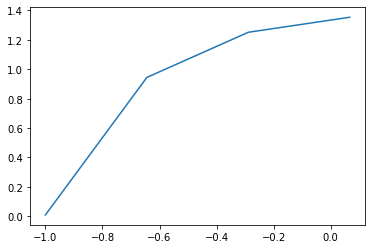

In [116]:

plt.plot(times, result[:,0])

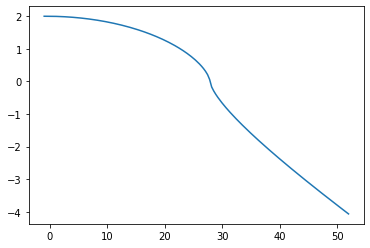

In [126]:
plt.plot(times, result[:,0])

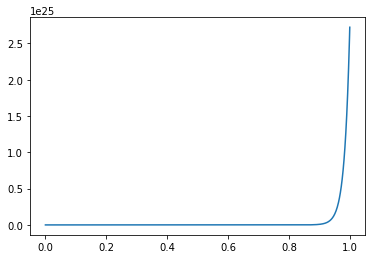

In [39]:
plt.plot(times, 1*np.exp(times*70*np.sqrt(0.7)))

In [36]:
np.exp(times*70*np.sqrt(0.7))

array([1.00000000e+000, 1.79723301e+000, 3.23004650e+000, 5.80514620e+000,
       1.04332004e+001, 1.87508922e+001, 3.36997224e+001, 6.05662537e+001,
       1.08851671e+002, 1.95631816e+002, 3.51595958e+002, 6.31899862e+002,
       1.13567129e+003, 2.04106594e+003, 3.66827108e+003, 6.59273789e+003,
       1.18486862e+004, 2.12948500e+004, 3.82718073e+004, 6.87833556e+004,
       1.23619717e+005, 2.22173437e+005, 3.99297435e+005, 7.17630533e+005,
       1.28974928e+006, 2.31797999e+006, 4.16595016e+006, 7.48718316e+006,
       1.34562127e+007, 2.41839498e+007, 4.34641929e+007, 7.81152823e+007,
       1.40391364e+008, 2.52315994e+008, 4.53470635e+008, 8.14992395e+008,
       1.46473124e+009, 2.63246333e+009, 4.73115001e+009, 8.50297898e+009,
       1.52818345e+010, 2.74650175e+010, 4.93610361e+010, 8.87132836e+010,
       1.59438442e+011, 2.86548031e+011, 5.14993582e+011, 9.25563466e+011,
       1.66345322e+012, 2.98961303e+012, 5.37303124e+012, 9.65658912e+012,
       1.73551408e+013, 3

In [23]:
from astropy.cosmology import wCDM

In [24]:
cos = wCDM(70, .3, .7, w0=-3)
dir(cos)

['H',
 'H0',
 'Neff',
 'Ob',
 'Ob0',
 'Ode',
 'Ode0',
 'Odm',
 'Odm0',
 'Ogamma',
 'Ogamma0',
 'Ok',
 'Ok0',
 'Om',
 'Om0',
 'Onu',
 'Onu0',
 'Tcmb',
 'Tcmb0',
 'Tnu',
 'Tnu0',
 '_H0',
 '_Neff',
 '_Ob0',
 '_Ode0',
 '_Odm0',
 '_Ogamma0',
 '_Ok0',
 '_Om0',
 '_Onu0',
 '_Tcmb0',
 '_Tnu0',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_abs_distance_integrand_scalar',
 '_age',
 '_comoving_distance_z1z2',
 '_comoving_transverse_distance_z1z2',
 '_critical_density0',
 '_h',
 '_hubble_distance',
 '_hubble_time',
 '_integral_age',
 '_integral_comoving_distance_z1z2',
 '_integral_lookback_time',
 '_inv_efunc_scalar',
 '_inv_efunc_scalar_ar

In [187]:
cos.de_density_scale(np.linspace(1000, .001, 10000))

array([9.94020944e-19, 9.94617028e-19, 9.95213530e-19, ...,
       3.33195396e-01, 5.61374464e-01, 9.94020944e-01])

In [190]:
de = cos.Ode(np.linspace(1000, .001, 10000))

In [191]:
m = cos.Om(np.linspace(1000, .001, 10000))

In [192]:
m + de

array([1., 1., 1., ..., 1., 1., 1.])

In [195]:
(m+de)[1]

1.0000000000000002